In [1]:
# Link to dataset : https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset?resource=download

# Trained based on numerous features 

In [1]:
# Mithil Patel
# Topic: Detecting Malicious URL
# Last update: Applied logistic Regression to the dataset and generated the model accuracy score. 
# Updated date: 9/24/2023


In [2]:
# Importing Dataframe
import pandas as pd
dataframe = pd.read_csv("dataset_phishing.csv")
dataframe.sample(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
10580,http://www.hemailing.com/test/827392642/b45de/...,177,17,1,3,1,0,1,2,0,...,1,0,0,238,-1,7576349,0,1,0,phishing
5480,https://thinclient.org/,23,14,0,1,0,0,0,0,0,...,1,1,0,71,7600,4609841,0,0,4,legitimate
8996,http://austid.cn/nJqnd4EUhvaxdy75NZJ3/,38,9,0,1,0,0,0,0,0,...,1,0,0,69,-1,0,0,1,0,phishing
4035,https://www.tumblr.com/search/amnesia%20anime,45,14,0,2,0,0,0,0,0,...,0,0,0,1051,5157,114,0,1,8,legitimate
6040,http://www.sexfreedomtube.com/,30,22,0,2,0,0,0,0,0,...,1,0,0,350,3303,2894528,0,0,2,legitimate
4859,http://www.mediacollege.com/video/shots/closeu...,52,20,0,3,0,0,0,0,0,...,1,0,0,831,-1,62214,0,0,5,legitimate
5699,https://www.hydros.net/,23,14,0,2,0,0,0,0,0,...,0,0,0,536,-1,0,0,0,1,legitimate
7517,https://family.hr/,18,9,0,1,0,0,0,0,0,...,0,1,0,234,2322,1342641,0,0,2,legitimate
4686,http://itlaw.wikia.com/wiki/Command_and_contro...,54,15,0,2,0,0,0,0,0,...,1,0,0,139,6071,14420,0,0,5,legitimate
9577,http://www.iptvlinksfree.com/,29,21,0,2,0,0,0,0,0,...,1,1,0,114,1346,504286,0,0,2,legitimate


In [4]:
print(list(dataframe.columns))

['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'rat

In [5]:
# Checking column data type
dataframe.dtypes

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object

In [6]:
# Checking for nulls
dataframe.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [7]:
dataframe.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [8]:
label_map = {'phishing': 0, 'legitimate': 1}

dataframe['status_encoded'] = dataframe['status'].map(label_map)
dataframe[['url','status','status_encoded']].sample(10)

,url,status,status_encoded
6340,https://www.walterland.net/,legitimate,1
3503,https://www.porndex.com/,legitimate,1
7120,https://www.acsportsacademy.com/,legitimate,1
9737,http://csrc.nist.gov/publications/nistpubs/800...,legitimate,1
1358,https://support-appleld.com.secureupdate.duila...,phishing,0
452,http://support-appleld.com.secureupdate.duilaw...,phishing,0
3218,http://alertagrcolombio.webcindario.com/,phishing,0
6226,https://emailmg.webhost4life.com/roundcube/,phishing,0
1233,http://support-appleld.com.secureupdate.duilaw...,phishing,0
2595,https://www.kj.com/,legitimate,1


In [10]:
# Creating correlation matrix
dataframe.corr()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status_encoded
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,-0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,-0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,-0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,-0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,-0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,-0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,-0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,0.511137


In [11]:
corr_matrix = dataframe.corr()
corr_columns = corr_matrix[abs(corr_matrix['status_encoded']) > 0.20]['status_encoded'].index.tolist()
corr_columns

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank',
 'status_encoded']

In [12]:
df = dataframe[corr_columns]
df.sample(5)

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,page_rank,status_encoded
5490,24,15,0,2,0,0,3,1,0.000000,0.0,...,0,0,44,1.000000,0,0,-1,0,3,1
6637,46,12,0,3,0,0,5,1,0.000000,0.0,...,10,0,150,0.900000,0,0,-1,1,2,0
799,66,13,1,2,1,1,3,0,0.272727,0.0,...,30,0,8,0.625000,1,1,1953,1,3,0
1879,83,16,0,3,0,0,5,1,0.084337,0.0,...,8,0,0,0.000000,1,1,11272,1,5,1
8096,102,24,0,2,0,0,6,1,0.000000,0.0,...,11,0,39,0.512821,0,1,6301,0,3,1


In [17]:
# Splitting dataset
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# Creating multiple model for best accuracy score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

results = []

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((model.__class__.__name__, acc_score, precision, recall, f1))

In [25]:
# Display the results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
results_df.sort_values(by= 'Accuracy', ascending= False)

,Model,Accuracy,Precision,Recall,F1 Score
3,XGBClassifier,0.967629,0.966408,0.969749,0.968076
2,RandomForestClassifier,0.961942,0.962803,0.961971,0.962387
1,DecisionTreeClassifier,0.926509,0.924464,0.930856,0.927649
0,SVC,0.721347,0.772537,0.636992,0.698247


# Training based on URL

In [3]:
label_map = {'phishing': 1, 'legitimate': 0}

dataframe['status_encoded'] = dataframe['status'].map(label_map)
dataframe[['url','status','status_encoded']].sample(5)

,url,status,status_encoded
9882,http://encyclopedia.kids.net.au/page/im/Impact...,legitimate,0
9791,https://forms.office.com/Pages/ResponsePage.as...,phishing,1
2226,http://www.tech-faq.com/hdmi-splitter.html,legitimate,0
4904,http://www.inforteltelecom.com.br/,legitimate,0
10301,https://www.ekupi.ba/,legitimate,0


In [4]:
# Updated dataframe
df = dataframe[['url','status_encoded']]
df.sample(5)

,url,status_encoded
1048,https://www.solidrop.net/,0
1909,http://schnurrberg.ch,0
4736,https://www.linotype.com/2221/blackletter-font...,0
3509,https://rasabisa.com/Chase.com/,1
7684,http://first2board.com/pointssummary/2015/05/0...,0


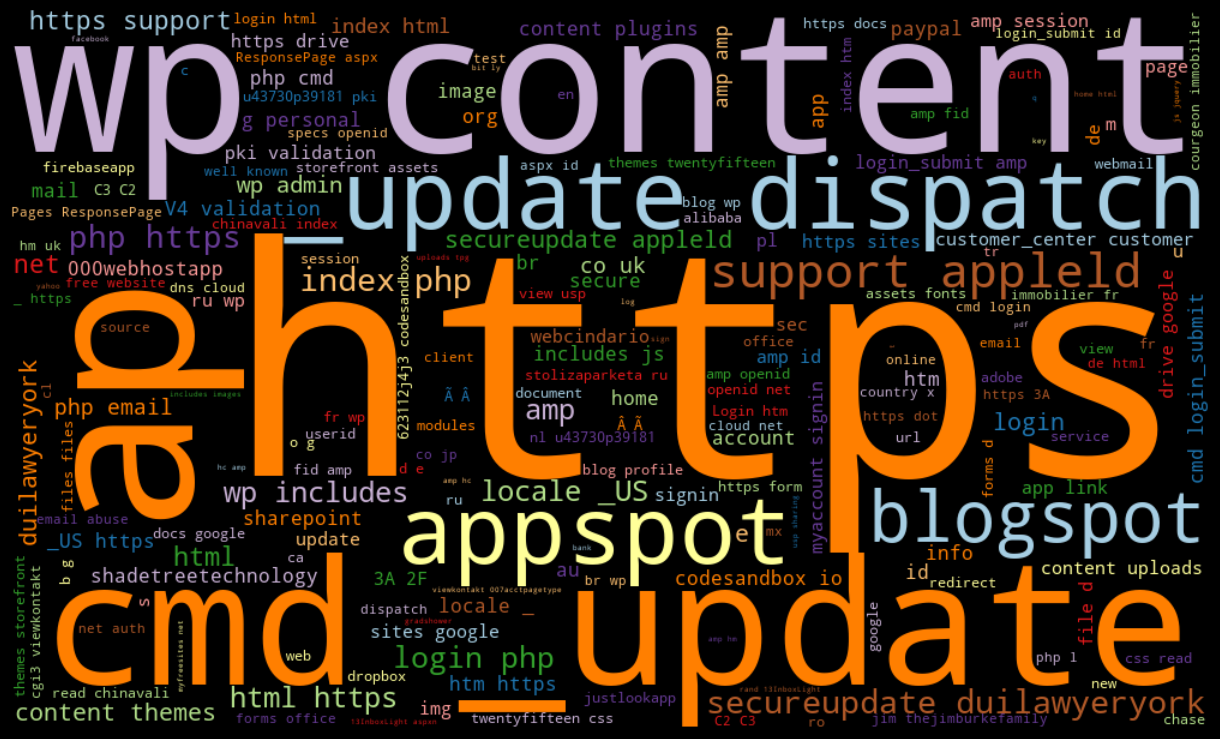

In [6]:
phish_df = df[df.status_encoded == 1] 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

phish_url = " ".join(i for i in phish_df.url)
wordcloud = WordCloud(width=1000, height=600,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [5]:
# https://www.section.io/engineering-education/detecting-malicious-url-using-machine-learning/
import warnings
warnings.filterwarnings("ignore")

# Dropping duplicates
df.drop_duplicates(inplace=True)

In [7]:
import re

# Cleaning text by splitting url by '/' and '.' 
# Once split, tokens were created 
def clean_Text(url):
    # Split url by '/' 
    url_tkn = re.findall(r'(\w+://|[\w\d.-]+(?:\.[\w\d.-]+)+|/[^/]+|/[?\w\d=]+)', url)
    
    # Removing ://
    tokens = [re.sub(r'[/:]','', i) for i in url_tkn]
    
    # Splitting each token by period
    new_tkn = [word.split('.') for word in tokens]
    
    # Use a list comprehension to flatten the nested list
    flattened_list = []
    [flattened_list.extend(sublist) for sublist in new_tkn]
    
    mod_token = list(set(flattened_list))
    final_tkns = [token for token in mod_token if token not in ['www','com']]
    return final_tkns

In [8]:
# Apply the clean_Text function to each row
df['tokens'] = df['url'].apply(lambda x: clean_Text(x))
df.sample(5)

,url,status_encoded,tokens
1312,https://oldmalayalamcinema.wordpress.com/,0,"[wordpress, oldmalayalamcinema, https]"
10337,https://en.wikipedia.org/wiki/Path_of_Exile,0,"[org, Path_of_Exile, wiki, https, wikipedia, en]"
10555,http://www.vh1.com/,0,"[http, vh1]"
4105,http://www.bargainballoons.com/10browse.asp?Ca...,0,"[10browse, asp?Category=Jumbo%20Number%20Ballo..."
3380,http://www.the-scientist.com/?articles.view/ar...,0,"[view, 34820, title, the-scientist, Opinion--T..."


In [12]:
# Coverting list to string for TF-IDF
df['token_str'] = df['tokens'].apply(lambda x: ' '.join(x))
df[['token_str','status_encoded']]

,token_str,status_encoded
0,php router crestonwood http,0
1,a111aedc8ae390eabcfa130e041a10a4 shadetreetech...,1
2,?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale...,1
3,ac rgipt http in,0
4,tracks http iracing gateway-motorsports-park,0
...,...,...
11425,fontspace category http blackletter,0
11426,php budgetbots php?email=USER@DOMAIN Server%20...,1
11427,photos facebook Interactive-Television-Pvt-Ltd...,0
11428,mypublicdomainpictures http,0


In [45]:
# Training Logistic Regression model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression

# Applying TF-IDF
v = TfidfVectorizer()
x = v.fit_transform(df['token_str'])
y = df['status_encoded']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# fitting the model
logit = LogisticRegression()
logit.fit(x_train, y_train)


LogisticRegression()

In [48]:
# Model Accuracy
print("Accuracy ",logit.score(x_test, y_test))

Accuracy  0.8910761154855643


In [49]:
# Testing model 
x_predict = ["https://www.section.io/engineering-education/",
"https://www.youtube.com/",
"https://www.traversymedia.com/", 
"https://www.kleinehundezuhause.com", 
"http://ttps://www.mecymiafinance.com",
"https://www.atlanticoceanicoilandgas.com"]

X_predict = v.transform(x_predict)
New_predict = logit.predict(X_predict)

array([1, 0, 1, 1, 1, 1], dtype=int64)

In [61]:
# Converting numerical results to text
label_mapping = {0: 'legitimate', 1: 'phishing'}

pred_result = [label_mapping[item] for item in New_predict]
pred_result

['phishing', 'legitimate', 'phishing', 'phishing', 'phishing', 'phishing']

In [62]:
# Creating Results Dataframe
results_data = {'URL': x_predict,
             'Result': pred_result}

results_df = pd.DataFrame(results_data)
results_df

,URL,Result
0,https://www.section.io/engineering-education/,phishing
1,https://www.youtube.com/,legitimate
2,https://www.traversymedia.com/,phishing
3,https://www.kleinehundezuhause.com,phishing
4,http://ttps://www.mecymiafinance.com,phishing
5,https://www.atlanticoceanicoilandgas.com,phishing
